# Ghana Health Facilities 

In [13]:
# Data libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

# libraries for download the data 
import os 
from urllib.request import urlretrieve

In [2]:
URL = 'https://data.gov.gh/sites/default/files/harvest_resources/HEALTH%2520FACILITIES%2520IN%2520GHANA.csv'

In [3]:
urlretrieve(URL, 'FacilitiesHealth.csv')

('FacilitiesHealth.csv', <http.client.HTTPMessage at 0xa191748>)

In [15]:
def download_data(url = URL, filename = 'FacilitiesHealth.csv', force = False):
    if not os.path.exists(filename):
        urlretrieve(url, filename)
        
    if force == True:
        urlretrieve(url, filename)
        
    data = pd.read_csv('FacilitiesHealth.csv')
    return data 
        
        

In [31]:
data_facilities = download_data()
print(data_facilities.shape)
data_facilities.head()


(3756, 8)


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [20]:
#looking for null data 
for col in data_facilities.columns:
    print(col, data_facilities.loc[:,col].isnull().sum())

Region 0
District 0
FacilityName 0
Type 0
Town 153
Ownership 0
Latitude 24
Longitude 24


In the dataset exist a few null data but still can be used so won't be erased rigth now

In [30]:
# This are the all the rows with miss data 
rows_nullData = data_facilities.loc[data_facilities.loc[:,'Town'].isnull() | data_facilities.loc[:,'Latitude'].isnull() | data_facilities.loc[:,'Longitude'].isnull()]
rows_nullData.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
357,Ashanti,Bosome Freho,Dunkura Health Centre,Health Centre,Dunkura,Government,NaN,NaN
358,Ashanti,Bosome Freho,Yapesa St.Mary Clinic,Clinic,Yapesa,CHAG,NaN,NaN
596,Ashanti,Kumasi Metropolitan,Amansie Enterprise Clinic,Clinic,NaN,Private,6.41500,-1.37548
626,Ashanti,Kumasi Metropolitan,Restoration Clinic,Clinic,NaN,Private,6.41500,-1.37548
645,Ashanti,Mampong Municipal,Calvary Health Service,Clinic,NaN,Private,7.03397,-1.24294


In [56]:
for col in ['Region', 'Type', 'Ownership']:
    print(col,  '\n', data_facilities.loc[:,col].value_counts(), '\n')

Region 
 Ashanti          658
Greater Accra    504
Western          496
Volta            398
Eastern          393
Brong Ahafo      348
Central          299
Northern         267
Upper East       232
Upper West       161
Name: Region, dtype: int64 

Type 
 Clinic                             1171
Health Centre                       786
CHPS                                652
Maternity Home                      369
Hospital                            277
RCH                                 152
District Health Directorate          99
District Hospital                    82
Training Institution                 74
Others                               31
Polyclinic                           16
Regional Health Directorate           9
Regional Hospital                     9
Municipal Health Directorate          7
Municipal Hospital                    4
Teaching Hospital                     3
Psychiatric Hospital                  3
Centre                                2
Research Institution     

Exist a lot of values that only appears a few times in types and ownership, furthermore exist values that were wrote more than once but without capital letters. To correct this, firstits necesary correct the values and then merge all values that have less than 50 to facilitate the analisis BUT this is only for a rough analysis of the general health facilities in the region not a specified analysis of wich types of facilities are needed according to the population needs, to do it will be necesary information about average situation of the patients and doctors.

In [67]:
# to correct the repeated values 
data_facilities.loc[:,'Type'] = data_facilities.loc[:,'Type'].str.lower()
data_facilities.loc[:,'Ownership'] = data_facilities.loc[:,'Ownership'].str.lower()

In [96]:
# Assign all the values under 50 to "others"

for idx in data_facilities.loc[:,'Type'].unique():
    temp = data_facilities.loc[:,'Type'].value_counts()
    if temp[idx] < 50:
        data_facilities.loc[(data_facilities.loc[:,'Type'] == idx), 'Type'] = 'others'
        
        
for idx in data_facilities.loc[:,'Ownership'].unique():
    temp = data_facilities.loc[:,'Ownership'].value_counts()
    if temp[idx] < 50:
        data_facilities.loc[(data_facilities.loc[:,'Ownership'] == idx), 'Ownership'] = 'others'
    
    

## Exploring the Data

In [231]:
data_facilities_region = data_facilities.groupby(['Region','Type'])['Type'].count()
data_facilities_region = data_facilities_region.reset_index(name = 'Sum_Type')
data_facilities_region.head()

,Region,Type,Sum_Type
0,Ashanti,chps,13
1,Ashanti,clinic,269
2,Ashanti,district health directorate,2
3,Ashanti,district hospital,14
4,Ashanti,health centre,136


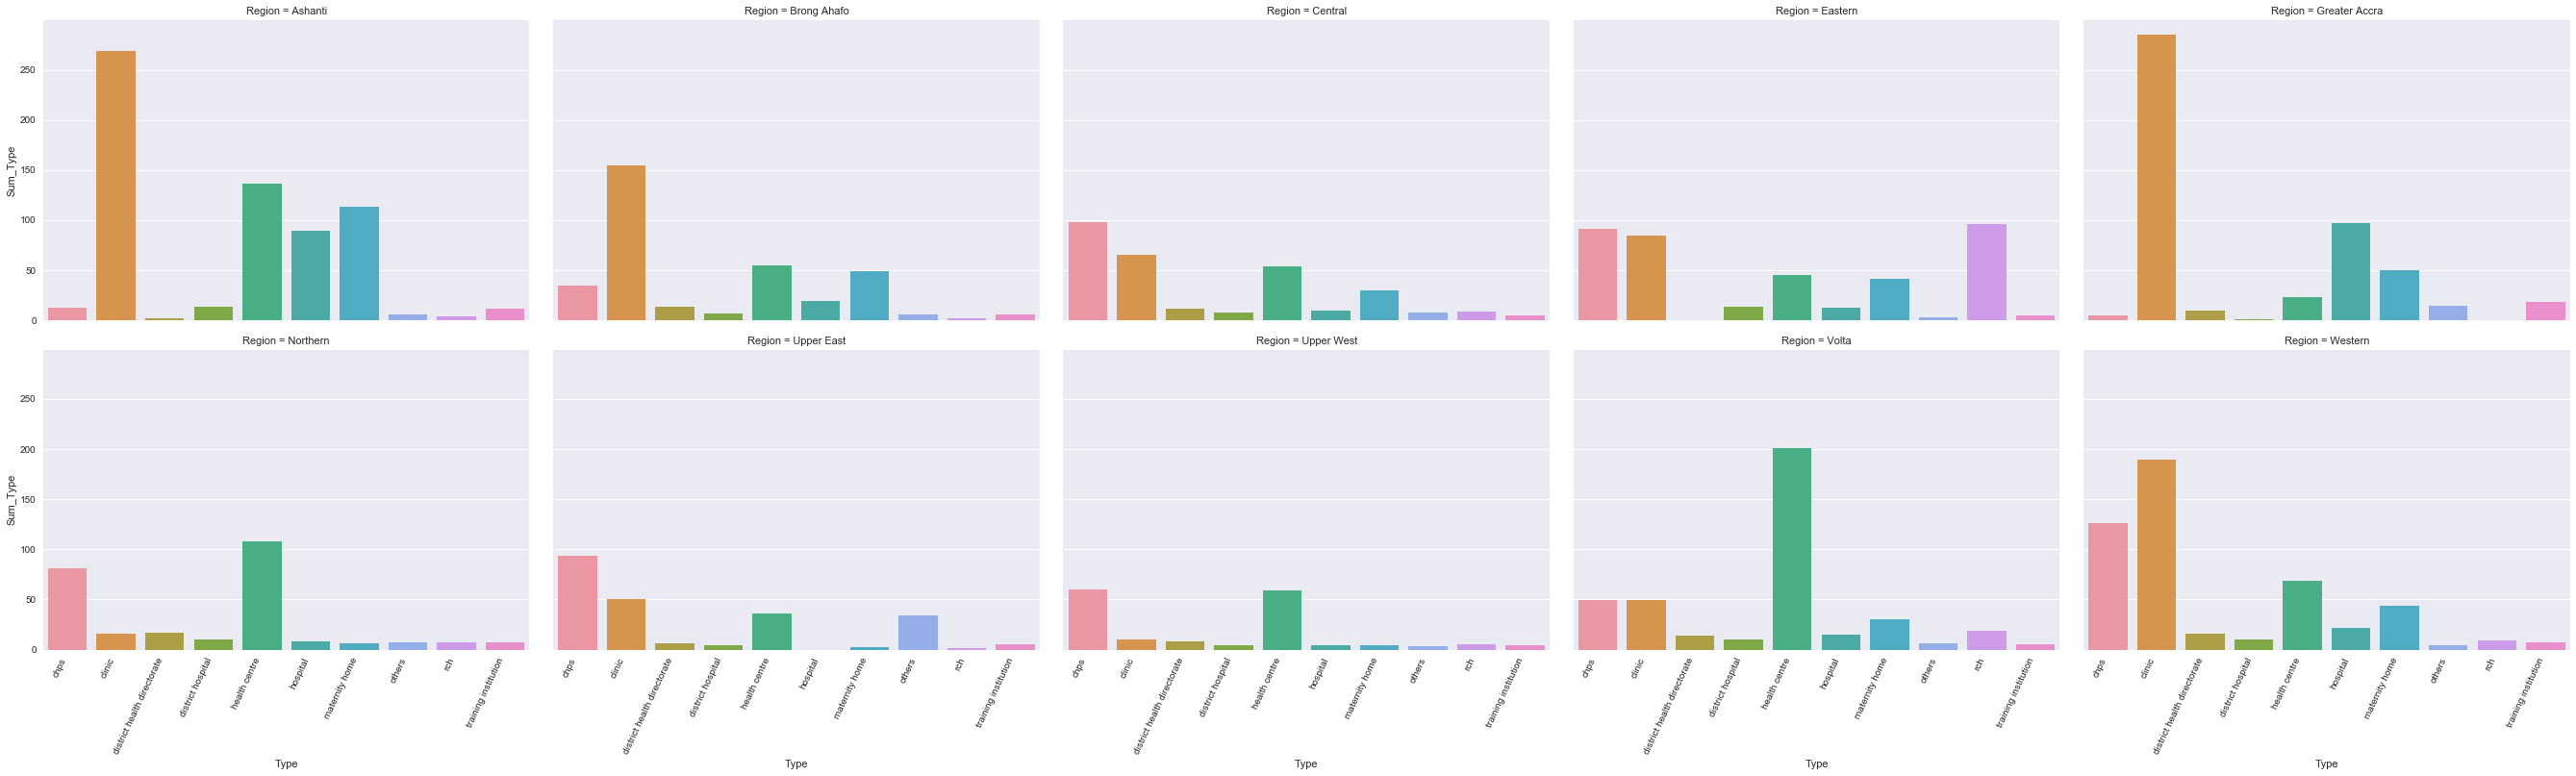

In [233]:
# Plot the number and type of facilities per region 
plt.style.use('seaborn')
region = sns.catplot( x = 'Type', y = 'Sum_Type', col = 'Region', data = data_facilities_region, kind = 'bar', height = 5, aspect = 1.5, col_wrap = 5, legend = True)
region.set_xticklabels(rotation = 65 , horizonalalignment = 'right')

for axe in region.axes.flat:
    axe.set_xticklabels(axe.get_xticklabels(), rotation = 65, horizontalalignment = 'right')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

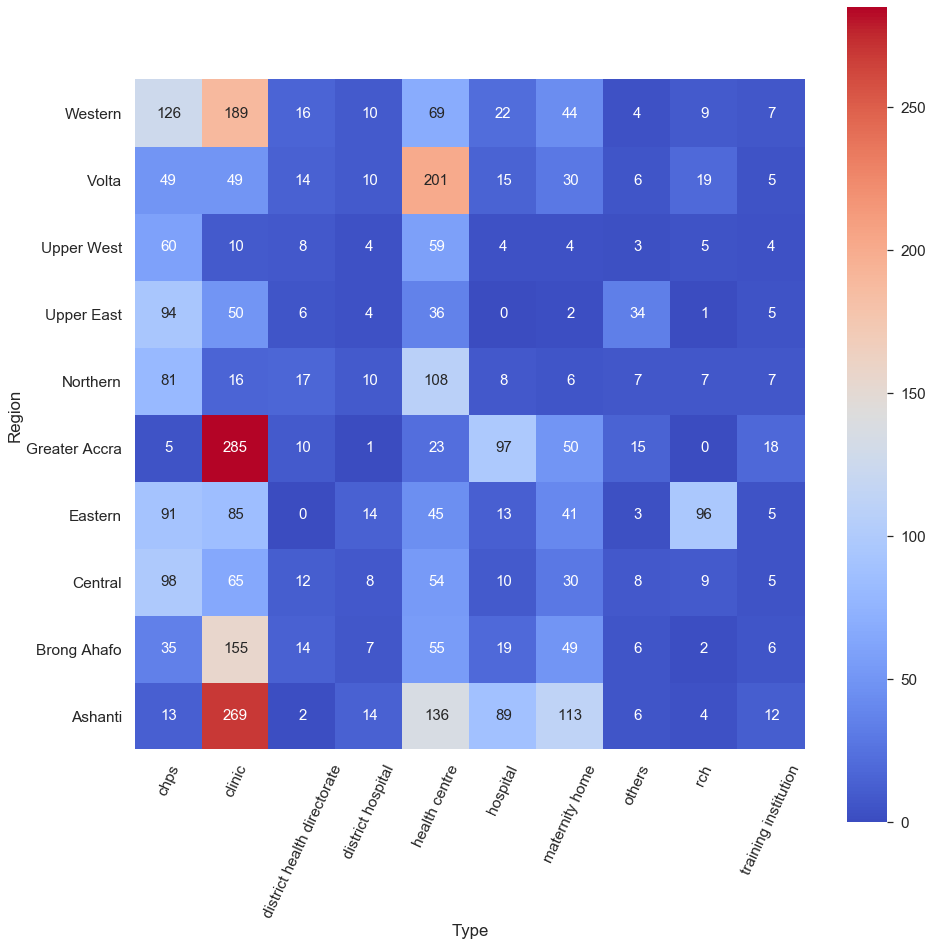

In [272]:
pivot_data_Facilities = pd.pivot_table(data_facilities_region, values = 'Sum_Type', index = ['Region'], columns = ['Type'])
#Exist some empty values, This will asume that if doesnt 
pivot_data_Facilities = pivot_data_Facilities.fillna(0)

plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)
heat = sns.heatmap(pivot_data_Facilities, square = True, annot = True, annot_kws = {'size': 15},fmt ='g', cmap = 'coolwarm')

heat.set_ylim([0,10])
plt.yticks(rotation = 0)
plt.xticks(rotation = 65)